# Clustering and separation methods
In this notebook, we test some clustering and separation methods of patients to, later, build the graph.

## Notebook plan : 
1. Data vizualization
2. Clustering algorithms

In [17]:
import pandas as pd
import numpy as np
from utils.preProcessing import preProcessing
from sklearn.manifold import TSNE
from models.Clustering import Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering

preprocessor = preProcessing()

## 1. Data reading and vizualization
We will use the t-SNE algorithm to project data in 2D.

In [18]:
# Reading
df = pd.read_excel('data/Supplemental-table1.xlsx')

# Select naive patients and collected columns containing the features
df = df.loc[df["Cohort"] == "Naive"]
X = df.loc[:,["Age at advanced disease diagnosis","CD8+ T cell score","Genome mut per mb","Exome mut per mb","CD274 expression","M1M2 expression"]].to_numpy()

# Normalization
X = preprocessor.normalize_data(X)

# Projection to 2D space
X_2d = TSNE(2).fit_transform(X)

### a. Per tumour type

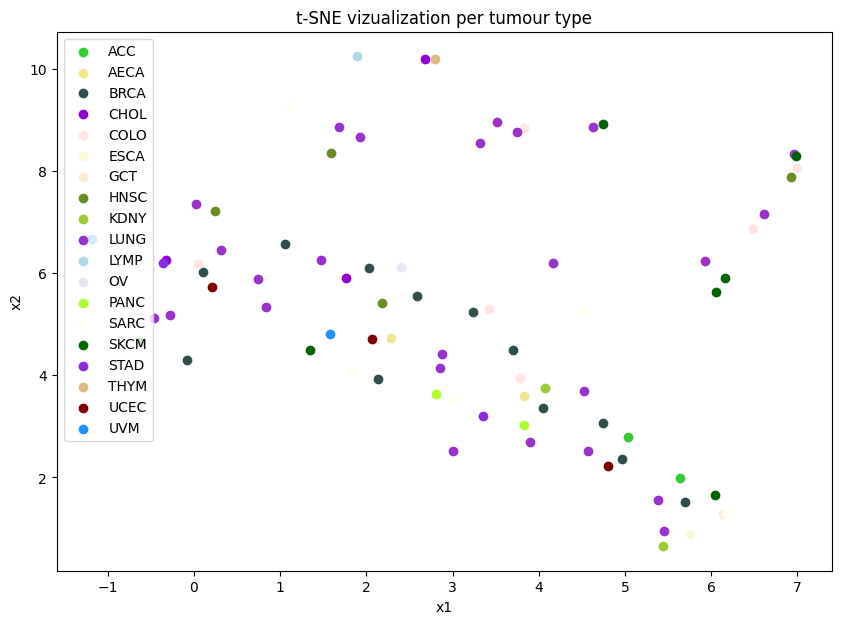

In [19]:
vizualize = Clustering(None)
y_tumour = df["Tumour type"].to_numpy()
vizualize.plot_2d_scatter(X_2d, y_tumour, 't-SNE vizualization per tumour type', 'tumour-type.png')

## 2. Clustering methods

### a. KMeans

/home/arthur/Documents/TN/3A/Stage/MEDomics/mutational-signatures/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


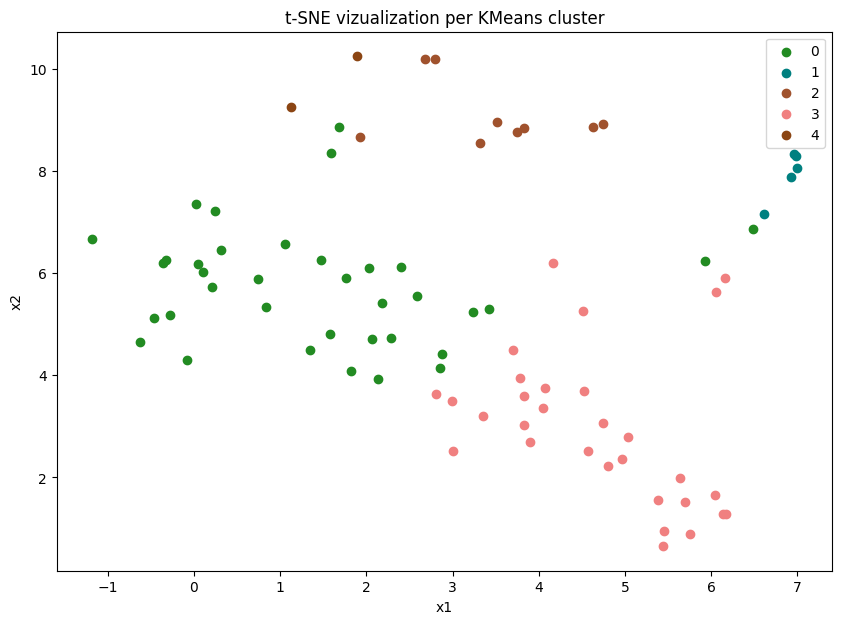

In [20]:
kmeans = Clustering(KMeans(5))
y_kmeans = kmeans.apply_clustering(X)
kmeans.plot_2d_scatter(X_2d, y_kmeans, "t-SNE vizualization per KMeans cluster","kmeans.png")

### b. Spectral clustering

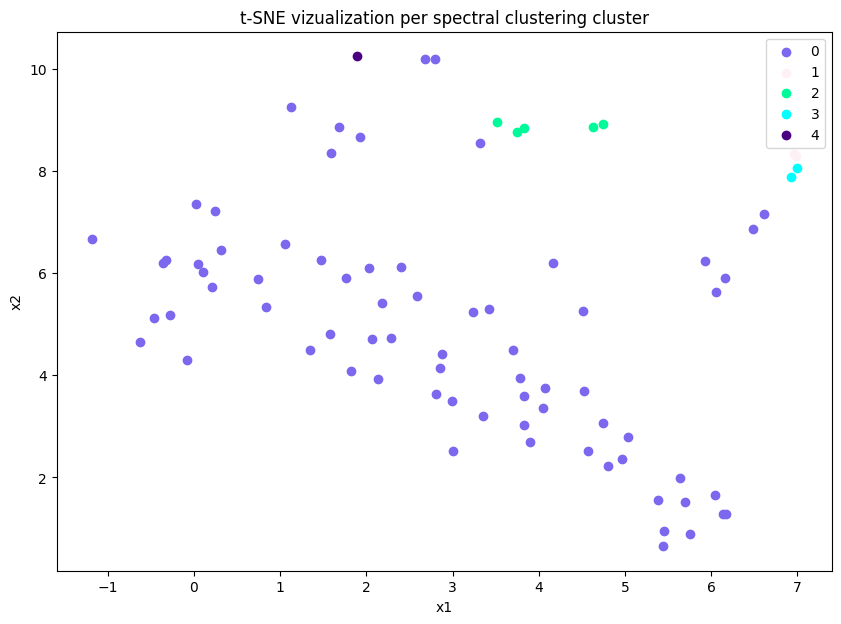

In [21]:
spectral = Clustering(SpectralClustering(5))
y_spectral = spectral.apply_clustering(X)
spectral.plot_2d_scatter(X_2d, y_spectral, "t-SNE vizualization per spectral clustering cluster","spectral.png")

### c. Agglomerative clustering

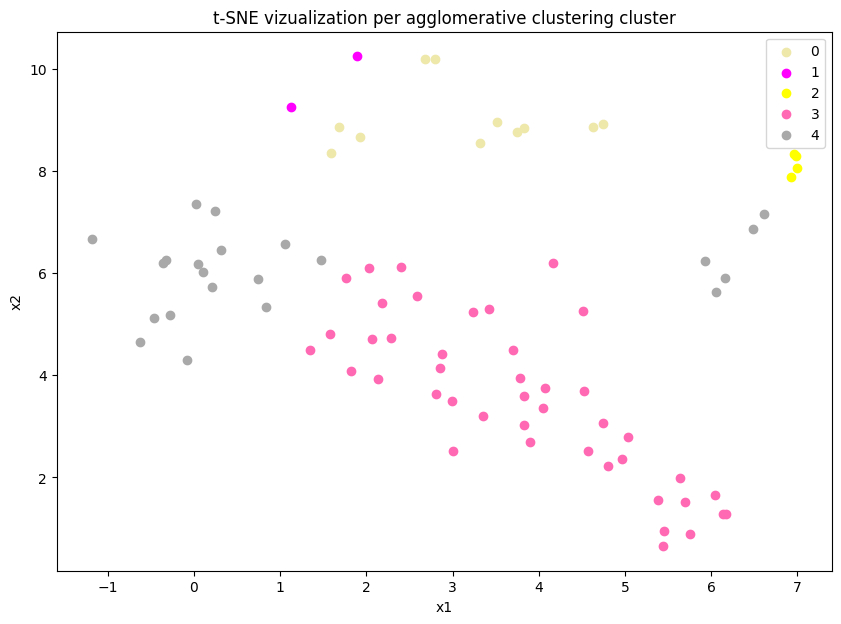

In [22]:
agglomerative = Clustering(AgglomerativeClustering(5))
y_agglomerative = agglomerative.apply_clustering(X)
agglomerative.plot_2d_scatter(X_2d, y_agglomerative, "t-SNE vizualization per agglomerative clustering cluster","agglomerative.png")